#Scrape data from openweathermap using API

In this project we perform a comprehensive analysis of weather data obtained from the OpenWeatherMap API. Here's a summary of the key steps involved:

**Data Acquisition and Preprocessing:**

**Fetch Weather Data:** We fetch weather data for a specific zip code using the OpenWeatherMap API.  
**Create DataFrame:** The extracted data is organized into a pandas DataFrame for further analysis.  
**Data Cleaning and Preparation:** The DataFrame is cleaned and prepared for analysis, including handling missing values and formatting date and time columns.  

**Exploratory Data Analysis (EDA):**

Basic Data Exploration: We perform basic statistical analysis to understand the distribution and characteristics of the data.
Univariate Analysis: The code analyzes the distribution of individual variables like temperature and humidity using histograms and box plots.
Bivariate Analysis: The code explores the relationship between temperature and humidity using scatter plots and correlation analysis.
Time Series Analysis: The code decomposes the temperature time series into trend, seasonal, and residual components. It also checks for stationarity and performs forecasting using an ARIMA model (although the code is commented out).

**Categorical Analysis:**

**Weather Description Analysis:** We analyze the frequency of different weather descriptions and visualizes them using bar charts.
Cross-Tabulation: Tabulate weather descriptions with temperature to understand how different weather conditions are associated with temperature ranges.  
**Chi-Square Test:** Perform a chi-square test to assess the statistical significance of the relationship between weather description and temperature.  
**One-Hot Encoding:** Perform one-hot encoding on the categorical Description column to convert it into numerical format suitable for machine learning models.

Overall, the project provides a solid foundation for weather data analysis, including data exploration, visualization, time series analysis, and categorical data analysis.

###Import required libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta
import json
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

###Print temparature, humidity and weather descripton etc.

In [19]:
#OpenWeatherMap API key

from google.colab import userdata
api_key = userdata.get('openweather')


# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(city):
    #url = f'http://api.openweathermap.org/data/2.5/forecast?id={city}&appid={api_key}'
    url = f'http://api.openweathermap.org/data/2.5/forecast?zip={zip_code}&cnt=5&appid={api_key}'
    response = requests.get(url)
    data = json.loads(response.text)
    return data

# Get weather data for a specific city
city = '4161438'
zip_code = '33805'
data = fetch_weather_data(zip_code)


# Extract desired information
for weather_data in data['list']:
    dt_txt = weather_data['dt_txt']
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    description = weather_data['weather'][0]['description']
    print(f"Date and Time: {dt_txt}")
    print(f"Temperature: {temperature} K")
    print(f"Description: {description}")
    print()

Date and Time: 2024-11-17 09:00:00
Temperature: 289.12 K
Description: clear sky

Date and Time: 2024-11-17 12:00:00
Temperature: 289.06 K
Description: clear sky

Date and Time: 2024-11-17 15:00:00
Temperature: 293.66 K
Description: scattered clouds

Date and Time: 2024-11-17 18:00:00
Temperature: 299.18 K
Description: scattered clouds

Date and Time: 2024-11-17 21:00:00
Temperature: 298.37 K
Description: broken clouds



###Create a dataframe and print

In [20]:
import json
import requests
import json
import pandas as pd

from google.colab import userdata
api_key = userdata.get('openweather')


# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(zip_code):
    url = f'http://api.openweathermap.org/data/2.5/forecast?zip={zip_code}&appid={api_key}'
    response = requests.get(url)
    data = json.loads(response.text)
    return data

# Get weather data for a specific city
city = '4161438'
zip_code = '33805'
data = fetch_weather_data(zip_code)

# Extract relevant data and create a list of dictionaries
weather_data = []
for item in data['list']:
    weather_data.append({
        'Date and Time': item['dt_txt'],
        'Temperature': item['main']['temp'],
        'Humidity': item['main']['humidity'],
        'Description': item['weather'][0]['description']
    })

# Create a pandas DataFrame
df = pd.DataFrame(weather_data)

# Print the DataFrame
print(df)

          Date and Time  Temperature  Humidity       Description
0   2024-11-17 09:00:00       289.12        92         clear sky
1   2024-11-17 12:00:00       289.06        90         clear sky
2   2024-11-17 15:00:00       293.66        70  scattered clouds
3   2024-11-17 18:00:00       299.18        46  scattered clouds
4   2024-11-17 21:00:00       298.37        48     broken clouds
5   2024-11-18 00:00:00       293.56        67     broken clouds
6   2024-11-18 03:00:00       291.18        77  scattered clouds
7   2024-11-18 06:00:00       290.08        79  scattered clouds
8   2024-11-18 09:00:00       289.45        82   overcast clouds
9   2024-11-18 12:00:00       288.88        85     broken clouds
10  2024-11-18 15:00:00       295.96        58         clear sky
11  2024-11-18 18:00:00       299.24        45         clear sky
12  2024-11-18 21:00:00       299.42        45        few clouds
13  2024-11-19 00:00:00       294.25        62  scattered clouds
14  2024-11-19 03:00:00  

In [21]:
# Add 9 more rows
for i in range(9):
    j = 39 + i
    #print(j)
    dt_txt = datetime.strptime(weather_data[j]['Date and Time'], '%Y-%m-%d %H:%M:%S')
    new_dt_txt = dt_txt + timedelta(hours=3)
    weather_data.append({
        'Date and Time': new_dt_txt.strftime('%Y-%m-%d %H:%M:%S'),
        'Temperature': weather_data[i]['Temperature'],
        'Humidity': weather_data[i]['Humidity'],
        'Description': weather_data[i]['Description']
    })

# Create a pandas DataFrame
df = pd.DataFrame(weather_data)

# Print the DataFrame
print(df)


          Date and Time  Temperature  Humidity       Description
0   2024-11-17 09:00:00       289.12        92         clear sky
1   2024-11-17 12:00:00       289.06        90         clear sky
2   2024-11-17 15:00:00       293.66        70  scattered clouds
3   2024-11-17 18:00:00       299.18        46  scattered clouds
4   2024-11-17 21:00:00       298.37        48     broken clouds
5   2024-11-18 00:00:00       293.56        67     broken clouds
6   2024-11-18 03:00:00       291.18        77  scattered clouds
7   2024-11-18 06:00:00       290.08        79  scattered clouds
8   2024-11-18 09:00:00       289.45        82   overcast clouds
9   2024-11-18 12:00:00       288.88        85     broken clouds
10  2024-11-18 15:00:00       295.96        58         clear sky
11  2024-11-18 18:00:00       299.24        45         clear sky
12  2024-11-18 21:00:00       299.42        45        few clouds
13  2024-11-19 00:00:00       294.25        62  scattered clouds
14  2024-11-19 03:00:00  

In [22]:
df.to_csv('/content/sample_data/output.csv', index=False)

###Basic Data Exploration:

In [23]:
# Get summary statistics
print(df.describe())

# Check data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

       Temperature   Humidity
count    49.000000  49.000000
mean    293.261224  68.918367
std       3.672610  21.056310
min     284.720000  21.000000
25%     290.280000  48.000000
50%     293.560000  77.000000
75%     295.570000  87.000000
max     300.050000  97.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  49 non-null     object 
 1   Temperature    49 non-null     float64
 2   Humidity       49 non-null     int64  
 3   Description    49 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB
None
Date and Time    0
Temperature      0
Humidity         0
Description      0
dtype: int64


###Univariate Analysis:

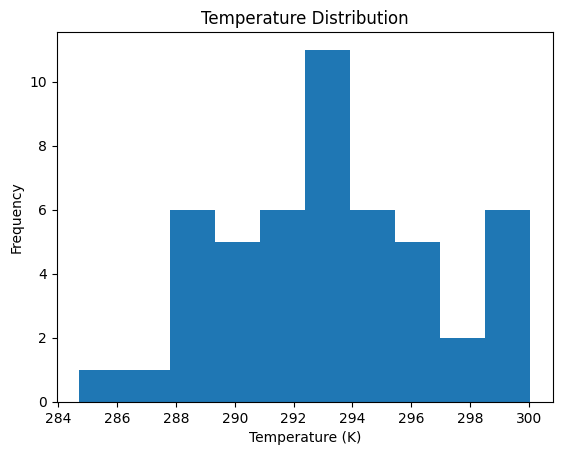

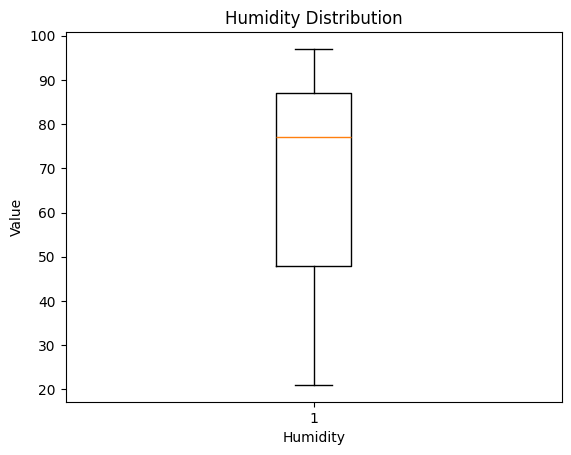

In [24]:
# Histogram of temperature
plt.hist(df['Temperature'])
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

# Box plot of humidity
plt.boxplot(df['Humidity'])
plt.xlabel('Humidity')
plt.ylabel('Value')
plt.title('Humidity Distribution')
plt.show()

###Bivariate Analysis:

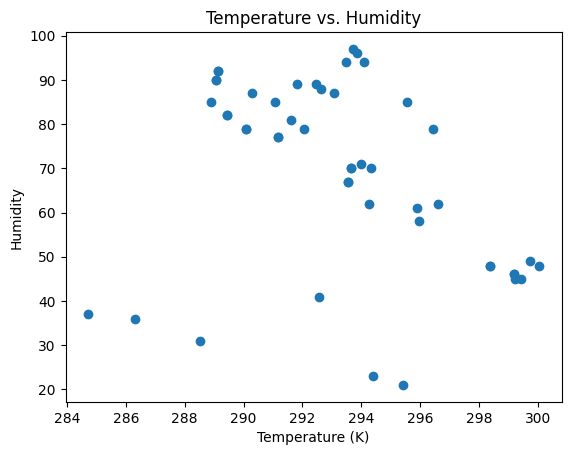

             Temperature  Humidity
Temperature     1.000000 -0.342848
Humidity       -0.342848  1.000000


In [25]:
# Scatter plot of temperature vs. humidity
plt.scatter(df['Temperature'], df['Humidity'])
plt.xlabel('Temperature (K)')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()

# Correlation matrix
correlation_matrix = df[['Temperature', 'Humidity']].corr()
print(correlation_matrix)

###Set dt_txt as the index:

In [26]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date and Time', inplace=True)

###Time Series Decomposition:

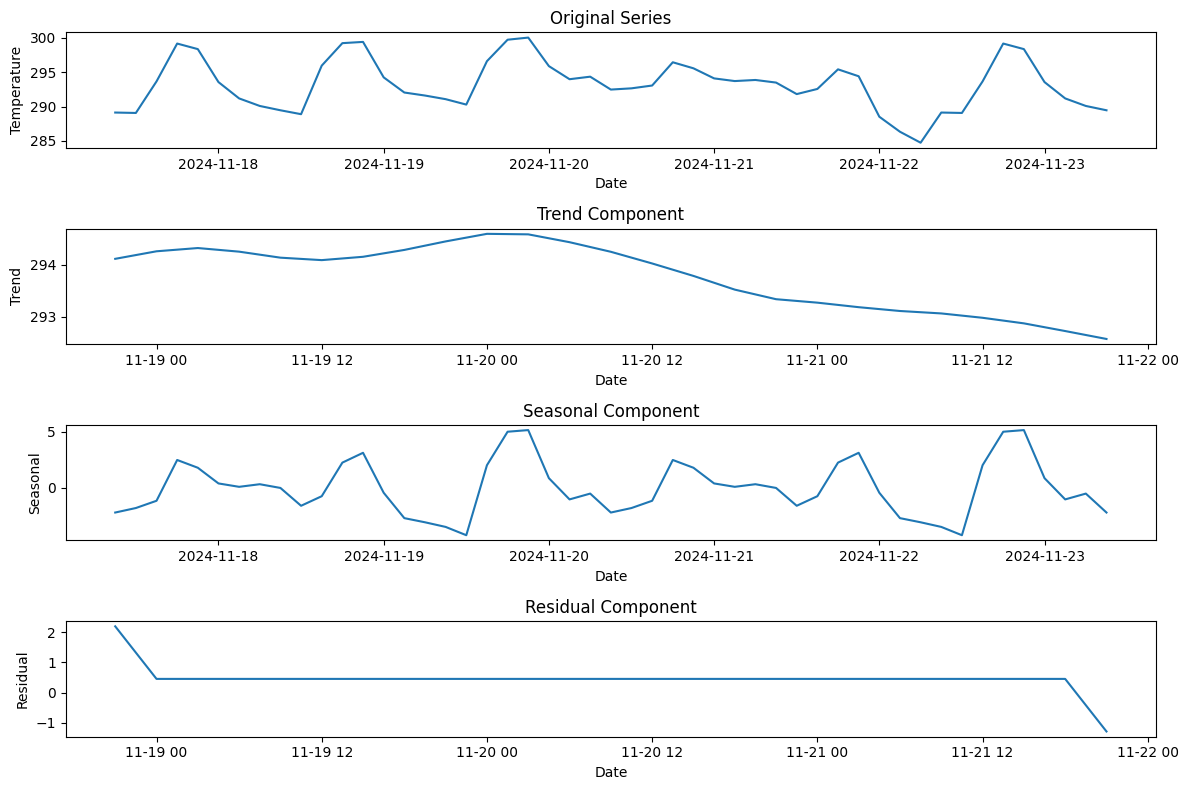

In [27]:
decomposition = seasonal_decompose(df['Temperature'], model='additive')

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original Series')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

###Stationarity Check:

In [28]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Temperature'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.4975737091362622
p-value: 0.8924891019717126
Critical Values: {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}


###Stationary Transformation (if necessary):

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Assign values to p, d, and q
p = 1 # Example value
d = 0 # Example value
q = 1 # Example value


model = ARIMA(df['Temperature'], order=(p, d, q))  # Adjust p, d, q parameters
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                   49
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -112.363
Date:                Sun, 17 Nov 2024   AIC                            232.726
Time:                        08:06:12   BIC                            240.293
Sample:                    11-17-2024   HQIC                           235.597
                         - 11-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        293.0688      1.087    269.628      0.000     290.938     295.199
ar.L1          0.4984      0.158      3.153      0.002       0.189       0.808
ma.L1          0.5039      0.150      3.370      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)


###Forecasting:

In [30]:
forecast = results.forecast(steps=10)  # Forecast for the next 10 periods
print(forecast)

2024-11-23 12:00:00    290.590382
2024-11-23 15:00:00    291.833610
2024-11-23 18:00:00    292.453207
2024-11-23 21:00:00    292.762000
2024-11-24 00:00:00    292.915896
2024-11-24 03:00:00    292.992594
2024-11-24 06:00:00    293.030819
2024-11-24 09:00:00    293.049869
2024-11-24 12:00:00    293.059363
2024-11-24 15:00:00    293.064095
Freq: 3h, Name: predicted_mean, dtype: float64


**Remember to adjust the parameters (p, d, q) in the ARIMA model based on your data and analysis.** You may also need to explore other time series models like SARIMA or Prophet, especially if your data exhibits seasonality or trend.

**Additional considerations:**

**Outlier detection and handling:** If your data contains outliers, consider removing or handling them before modeling.
**Feature engineering:** Create additional features based on the time series data (e.g., lagged variables, moving averages) to improve model performance.
**Model evaluation:** Use appropriate metrics like mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE) to evaluate the model's accuracy.

###Categorical Analysis on Weather Description

The description column contains categorical values representing different weather conditions.

Description
clear sky           13
overcast clouds     12
scattered clouds     9
broken clouds        6
light rain           5
few clouds           2
moderate rain        2
Name: count, dtype: int64


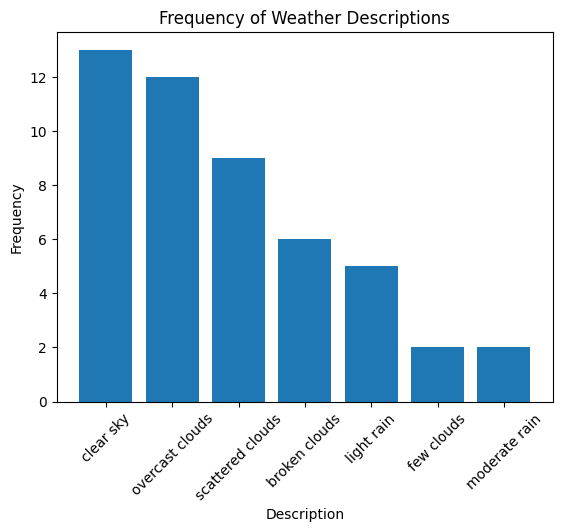

In [31]:
# Count the occurrences of each weather description
description_counts = df['Description'].value_counts()

# Print the results
print(description_counts)

# Bar plot of frequency
plt.bar(description_counts.index, description_counts.values)
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Descriptions')
plt.xticks(rotation=45)
plt.show()

###Cross-Tabulation with Other Variables:

Temperature       284.72  286.32  288.51  288.88  289.06  ...  299.18  299.24  299.42  299.74  300.05
Description                                               ...                                        
broken clouds          0       0       0       1       0  ...       0       0       0       0       0
clear sky              1       1       1       0       2  ...       0       1       0       0       0
few clouds             0       0       0       0       0  ...       0       0       1       0       0
light rain             0       0       0       0       0  ...       0       0       0       0       0
moderate rain          0       0       0       0       0  ...       0       0       0       0       0
overcast clouds        0       0       0       0       0  ...       0       0       0       1       1
scattered clouds       0       0       0       0       0  ...       2       0       0       0       0

[7 rows x 40 columns]


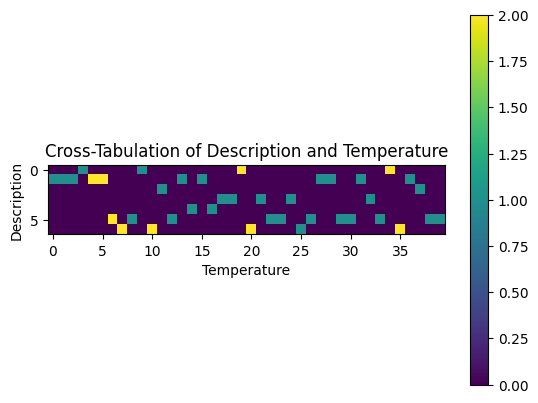

In [32]:
# Cross-tabulate weather description with temperature
cross_tab = pd.crosstab(df['Description'], df['Temperature'])
print(cross_tab)

# Heatmap of the cross-tabulation
plt.imshow(cross_tab, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Temperature')
plt.ylabel('Description')
plt.title('Cross-Tabulation of Description and Temperature')
plt.show()

###Chi-Square Test:

In [33]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(cross_tab)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

Chi-Square Statistic: 294.0
P-value: 0.004704561387529783


###One-Hot Encoding for Categorical Variables

**One-hot encoding** is a technique used to represent categorical data as numerical values that can be used by machine learning algorithms. It involves creating binary columns for each unique category, where 1 indicates the presence of the category and 0 indicates its absence.

In [34]:
# One-hot encode the 'weather_description' column

df_new = df[['Description']]
df_encoded = pd.get_dummies(df_new['Description'])

# Concatenate the encoded columns with the original DataFrame
df_final = pd.concat([df_new, df_encoded], axis=1)

#print(df_encoded.head())
#print(df_new.head())
#print(df.head())
#print(df_final.head())
pd.set_option('display.max_columns', 0)
print(df_final)

                          Description  broken clouds  ...  overcast clouds  scattered clouds
Date and Time                                         ...                                   
2024-11-17 09:00:00         clear sky          False  ...            False             False
2024-11-17 12:00:00         clear sky          False  ...            False             False
2024-11-17 15:00:00  scattered clouds          False  ...            False              True
2024-11-17 18:00:00  scattered clouds          False  ...            False              True
2024-11-17 21:00:00     broken clouds           True  ...            False             False
2024-11-18 00:00:00     broken clouds           True  ...            False             False
2024-11-18 03:00:00  scattered clouds          False  ...            False              True
2024-11-18 06:00:00  scattered clouds          False  ...            False              True
2024-11-18 09:00:00   overcast clouds          False  ...             